In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import gym
import gym_anytrading
# from finta import TA

In [ ]:
# import fxcmpy
# import socketio
# import engineio

In [ ]:
# print(fxcmpy.__version__)
# print(socketio.__version__)
# print("python-engineio version:", engineio.__version__)

In [ ]:
# con = fxcmpy.fxcmpy(access_token = TOKEN, log_level = 'error')
# instruments = con.get_instruments()
# print(instruments)

In [ ]:

# start = dt.datetime(2020, 1, 1)
# end = dt.datetime(2020, 12, 31)
# data = con.get_candles('GBP/USD', period='m15',
#                 start=start, end=end)
# Data.to_csv('hist_data.csv')

In [2]:
df = pd.read_csv('hist_data.csv')

In [3]:
#df = df.set_index('date')
df.head()

,date,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
0,02/01/2020 06:45,1.32496,1.32208,1.32208,1.32181,1.32519,1.32210,1.32210,1.32197,69
1,02/01/2020 07:00,1.32208,1.32245,1.32278,1.32155,1.32210,1.32264,1.32294,1.32170,4317
2,02/01/2020 07:15,1.32245,1.32199,1.32289,1.32142,1.32264,1.32212,1.32304,1.32157,2867
3,02/01/2020 07:30,1.32199,1.32206,1.32228,1.32091,1.32212,1.32221,1.32245,1.32105,5135
4,02/01/2020 07:45,1.32206,1.32191,1.32259,1.32165,1.32221,1.32205,1.32274,1.32181,2497


In [4]:
df_copy = df.copy()

In [5]:
# mid price of ask and bid close price as 'Close', which will be used as to analyse fx market
df_copy['Close'] = (df['bidclose']+df['askclose'])/2


In [6]:
df_copy['spread']=df['askclose'] - df['bidclose']

In [7]:
# average spread is about 2 pips, which indicates if trade $5000 or above it is worth to pay fixed commisioon fee, say 1 pound each trade; 
# if below £5000 each trade, pay commission rate woulld be better off, normally is the spread, 0.02%
df_copy['spread'].mean()

0.00020297777245700184

In [8]:
df_copy.head()


,date,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,Close,spread
0,02/01/2020 06:45,1.32496,1.32208,1.32208,1.32181,1.32519,1.32210,1.32210,1.32197,69,1.322090,0.00002
1,02/01/2020 07:00,1.32208,1.32245,1.32278,1.32155,1.32210,1.32264,1.32294,1.32170,4317,1.322545,0.00019
2,02/01/2020 07:15,1.32245,1.32199,1.32289,1.32142,1.32264,1.32212,1.32304,1.32157,2867,1.322055,0.00013
3,02/01/2020 07:30,1.32199,1.32206,1.32228,1.32091,1.32212,1.32221,1.32245,1.32105,5135,1.322135,0.00015
4,02/01/2020 07:45,1.32206,1.32191,1.32259,1.32165,1.32221,1.32205,1.32274,1.32181,2497,1.321980,0.00014


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      25059 non-null  object 
 1   bidopen   25059 non-null  float64
 2   bidclose  25059 non-null  float64
 3   bidhigh   25059 non-null  float64
 4   bidlow    25059 non-null  float64
 5   askopen   25059 non-null  float64
 6   askclose  25059 non-null  float64
 7   askhigh   25059 non-null  float64
 8   asklow    25059 non-null  float64
 9   tickqty   25059 non-null  int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 1.9+ MB


Stationary test

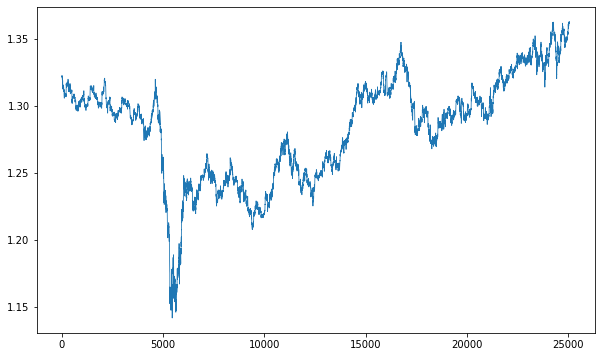

In [10]:
df_copy['Close'].plot(figsize=(10, 6), lw=0.8);
# the graph doesn't show stationary feature

<AxesSubplot:>

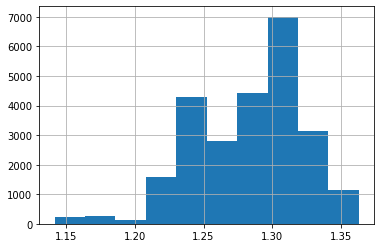

In [11]:
df_copy['Close'].hist()
# the price distribution looks skewed

<AxesSubplot:>

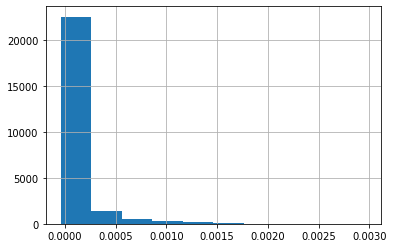

In [12]:
df_copy['spread'].hist()


<AxesSubplot:ylabel='Density'>

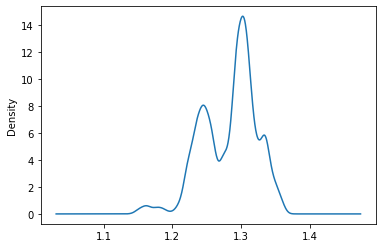

In [13]:
df_copy['Close'].plot(kind='kde')
# with kernel density estimatiom method, we can see the data distribution much clearer.
# the two peaks are likely represent the major time regimes of fx market

<AxesSubplot:ylabel='Density'>

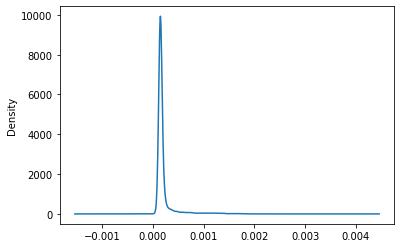

In [14]:
df_copy['spread'].plot(kind='kde')

In [14]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(df_copy['Close'])

Results of Dickey-Fuller Test:
Test Statistic                    -1.223573
p-value                            0.663374
#Lags Used                        45.000000
Number of Observations Used    25013.000000
Critical Value (1%)               -3.430611
Critical Value (5%)               -2.861656
Critical Value (10%)              -2.566832
dtype: float64


In [15]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test(df_copy['Close'])


Results of KPSS Test:
Test Statistic           18.254808
p-value                   0.010000
Lags Used                48.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\huomi\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\huomi\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


Both augmented Dickey Fuller and KPSS tests suggested that the data is nonstationary.
Thus the fx market is a kind of random walk, we cannot make any prediction based on this data directly.
In this project, moving average were added as indicator/ features.

In [16]:

import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import datetime 


In [17]:
# 'fast' and 'slow' moving averages created
df_copy['fast'] = df_copy['Close'].rolling(window=5).mean()
df_copy['slow'] = df_copy['Close'].rolling(window=10).mean()

In [18]:
def get_up_cross(df):
    feature1 = df.fast.shift(1) < df.slow.shift(1)
    feature2 = df.fast > df.slow
    return df.fast[(feature1) & (feature2)]

def get_down_cross(df):
    feature1 = df.fast.shift(1) > df.slow.shift(1)
    feature2 = df.fast < df.slow
    return df.fast[(feature1) & (feature2)]

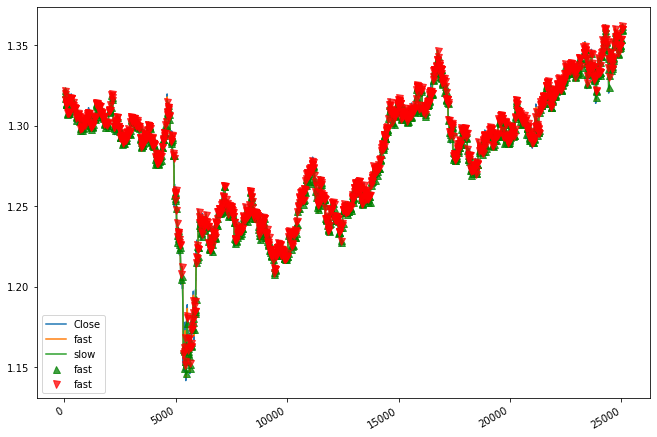

In [19]:
# create a buy and sell markers based on the windows above

up = get_up_cross(df_copy)
down = get_down_cross(df_copy)

fig, ax = plt.subplots(figsize=(11,8))

# Plot the adjusted closing price, the short and long windows of rolling means
df_copy[['Close', 'fast', 'slow']].plot(ax=ax, grid=True)

up.to_frame().plot(ax=ax,ls='',marker='^', markersize=7,
                     alpha=0.75, label='upcross', color='g')
down.to_frame().plot(ax=ax,ls='',marker='v', markersize=7, 
                       alpha=0.75, label='downcross', color='r')
fig.autofmt_xdate() 
ax.legend()

In [20]:
A =df_copy[:100]

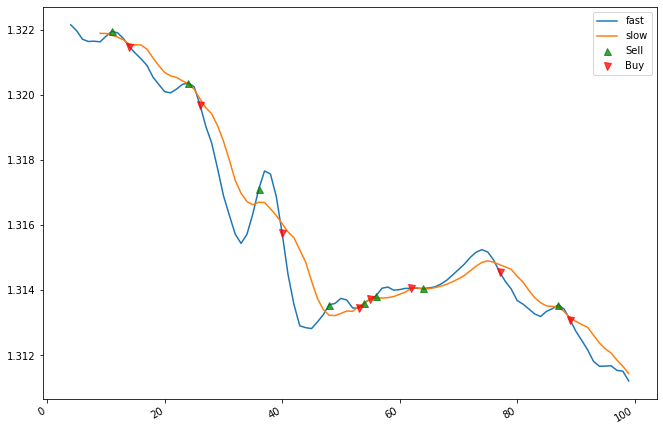

In [30]:
# Closer look the buy and sell markers on fast window and slow window

up = get_up_cross(A)
down = get_down_cross(A)

fig, ax = plt.subplots(figsize=(11,8))

# Plot the adjusted closing price, the short and long windows of rolling means
A[['fast', 'slow']].plot(ax=ax, grid=True)
up.to_frame().plot(ax=ax,ls='',marker='^', markersize=7,
                     alpha=0.75, label='sell', color='g')
down.to_frame().plot(ax=ax,ls='',marker='v', markersize=7, 
                       alpha=0.75, label='buy', color='r')
fig.autofmt_xdate() 
plt.legend(['fast', 'slow', 'Sell', 'Buy'])
plt.show()


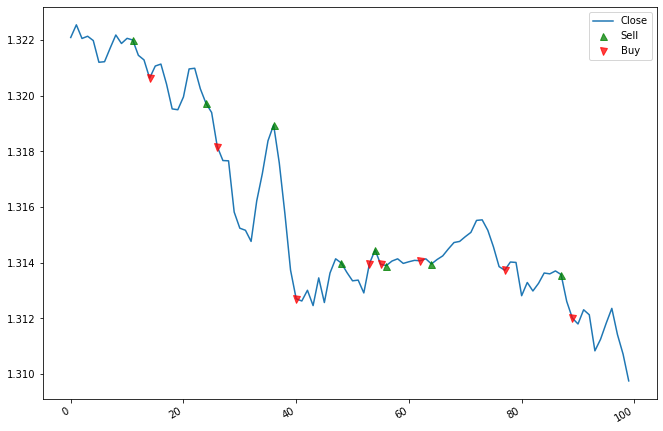

In [27]:
# Closer look the the buy and sell marker on Close price
up = get_up_cross(A).to_frame()
down = get_down_cross(A).to_frame()

fig, ax = plt.subplots(figsize=(11,8))

# Plot the adjusted closing price, the short and long windows of rolling means
A[['Close']].plot(ax=ax, grid=True)
for i in up.index:
   up['fast'][i]= A['Close'][i]
for i in down.index:
   down['fast'][i]=A['Close'][i]


up.plot(ax = ax, ls='',marker='^', legend={'sell'}, markersize=7, 
                     alpha=0.75, label='sell', color='g')

down.plot(ax=ax,ls='',marker='v', markersize=7, legend={'buy'},
                        alpha=0.75, label='buy', color='r')
fig.autofmt_xdate() 
plt.legend(['Close', 'Sell', 'Buy'])
plt.show()


The indicator was not bad, if close look at the the green marker pretty indicates the local high price, and the red at the low price. 
I am not going to use this points in this project, but the values of the features will be given to the agent to decide when to trade.

In [31]:
# create a column of the differece of 'fast' and 'slow' and one of shift 1 place, as the features for agent to learn
df_copy['feature1'] = df_copy.fast.shift(1) - df_copy.slow.shift(1)
df_copy['feature2'] = df_copy.fast - df_copy.slow

<AxesSubplot:>

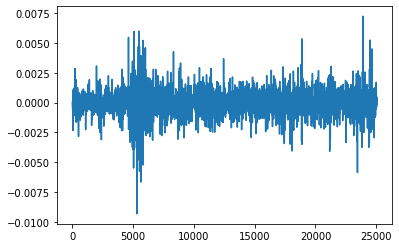

In [32]:
df_copy['feature1'].plot()
# on the whole, two features look pretty same and stationary

In [33]:
adf_test(df_copy['feature1'][15:])

Results of Dickey-Fuller Test:
Test Statistic                   -21.348963
p-value                            0.000000
#Lags Used                        48.000000
Number of Observations Used    24995.000000
Critical Value (1%)               -3.430612
Critical Value (5%)               -2.861656
Critical Value (10%)              -2.566832
dtype: float64


Dickey Fuller test show it is a perfect stationary dataset.

<AxesSubplot:>

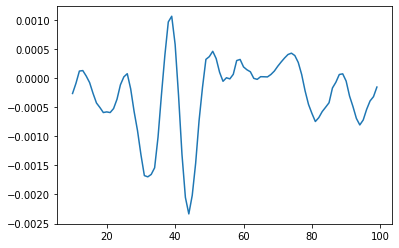

In [34]:
df_copy['feature1'][:100].plot()
# take a closer look, the feature is quite seasonal. 
# lately when estimating Q value with this feature in Q learning, linear regression with fourier base can be used.

As mentioned above, I am going to use linear model with fourier base method to estimate Q value.
Have a look at how fourier base method works.

In [36]:
df_copy.head(20)

,date,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,Close,spread,fast,slow,feature1,feature2
0,02/01/2020 06:45,1.32496,1.32208,1.32208,1.32181,1.32519,1.32210,1.32210,1.32197,69,1.322090,0.00002,NaN,NaN,NaN,NaN
1,02/01/2020 07:00,1.32208,1.32245,1.32278,1.32155,1.32210,1.32264,1.32294,1.32170,4317,1.322545,0.00019,NaN,NaN,NaN,NaN
2,02/01/2020 07:15,1.32245,1.32199,1.32289,1.32142,1.32264,1.32212,1.32304,1.32157,2867,1.322055,0.00013,NaN,NaN,NaN,NaN
3,02/01/2020 07:30,1.32199,1.32206,1.32228,1.32091,1.32212,1.32221,1.32245,1.32105,5135,1.322135,0.00015,NaN,NaN,NaN,NaN
4,02/01/2020 07:45,1.32206,1.32191,1.32259,1.32165,1.32221,1.32205,1.32274,1.32181,2497,1.321980,0.00014,1.322161,NaN,NaN,NaN
5,02/01/2020 08:00,1.32191,1.32110,1.32260,1.32103,1.32205,1.32130,1.32277,1.32117,5616,1.321200,0.00020,1.321983,NaN,NaN,NaN
6,02/01/2020 08:15,1.32110,1.32113,1.32242,1.32085,1.32130,1.32131,1.32260,1.32100,4397,1.321220,0.00018,1.321718,NaN,NaN,NaN
7,02/01/2020 08:30,1.32113,1.32164,1.32214,1.32111,1.32131,1.32178,1.32226,1.32126,2772,1.321710,0.00014,1.321649,NaN,NaN,NaN
8,02/01/2020 08:45,1.32164,1.32209,1.32300,1.32164,1.32178,1.32227,1.32316,1.32179,5815,1.322180,0.00018,1.321658,NaN,NaN,NaN
9,02/01/2020 09:00,1.32209,1.32180,1.32264,1.32162,1.32227,1.32195,1.32281,1.32176,2644,1.321875,0.00015,1.321637,1.321899,NaN,-0.000262


In [39]:
# create a column of RSI indicator
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    df['RSI']=rsi
    return df

In [41]:
df_copy = rsi(df_copy)

In [42]:
df_copy.head(20)

,date,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,Close,spread,fast,slow,feature1,feature2,RSI
0,02/01/2020 06:45,1.32496,1.32208,1.32208,1.32181,1.32519,1.32210,1.32210,1.32197,69,1.322090,0.00002,NaN,NaN,NaN,NaN,NaN
1,02/01/2020 07:00,1.32208,1.32245,1.32278,1.32155,1.32210,1.32264,1.32294,1.32170,4317,1.322545,0.00019,NaN,NaN,NaN,NaN,NaN
2,02/01/2020 07:15,1.32245,1.32199,1.32289,1.32142,1.32264,1.32212,1.32304,1.32157,2867,1.322055,0.00013,NaN,NaN,NaN,NaN,NaN
3,02/01/2020 07:30,1.32199,1.32206,1.32228,1.32091,1.32212,1.32221,1.32245,1.32105,5135,1.322135,0.00015,NaN,NaN,NaN,NaN,NaN
4,02/01/2020 07:45,1.32206,1.32191,1.32259,1.32165,1.32221,1.32205,1.32274,1.32181,2497,1.321980,0.00014,1.322161,NaN,NaN,NaN,NaN
5,02/01/2020 08:00,1.32191,1.32110,1.32260,1.32103,1.32205,1.32130,1.32277,1.32117,5616,1.321200,0.00020,1.321983,NaN,NaN,NaN,NaN
6,02/01/2020 08:15,1.32110,1.32113,1.32242,1.32085,1.32130,1.32131,1.32260,1.32100,4397,1.321220,0.00018,1.321718,NaN,NaN,NaN,NaN
7,02/01/2020 08:30,1.32113,1.32164,1.32214,1.32111,1.32131,1.32178,1.32226,1.32126,2772,1.321710,0.00014,1.321649,NaN,NaN,NaN,NaN
8,02/01/2020 08:45,1.32164,1.32209,1.32300,1.32164,1.32178,1.32227,1.32316,1.32179,5815,1.322180,0.00018,1.321658,NaN,NaN,NaN,NaN
9,02/01/2020 09:00,1.32209,1.32180,1.32264,1.32162,1.32227,1.32195,1.32281,1.32176,2644,1.321875,0.00015,1.321637,1.321899,NaN,-0.000262,NaN


In [80]:
# create Parabolic SAR column
from pandas import DataFrame, Series
def sar(df, af=0.02, amax=0.2):
    high, low = df.askhigh, df.bidlow

    # Starting values
    sig0, xpt0, af0 = True, high[0], af
    sar = [low[0] - (high - low).std()]

    for i in range(1, len(df)):
        sig1, xpt1, af1 = sig0, xpt0, af0

        lmin = min(low[i - 1], low[i])
        lmax = max(high[i - 1], high[i])

        if sig1:
            sig0 = low[i] > sar[-1]
            xpt0 = max(lmax, xpt1)
        else:
            sig0 = high[i] >= sar[-1]
            xpt0 = min(lmin, xpt1)

        if sig0 == sig1:
            sari = sar[-1] + (xpt1 - sar[-1])*af1
            af0 = min(amax, af1 + af)

            if sig0:
                af0 = af0 if xpt0 > xpt1 else af1
                sari = min(sari, lmin)
            else:
                af0 = af0 if xpt0 < xpt1 else af1
                sari = max(sari, lmax)
        else:
            af0 = af
            sari = xpt0

        sar.append(sari)
    df['SAR']=Series(sar, index=df.index)

    return df

In [54]:
# pip install --upgrade ta


In [81]:
df_copy = sar(df_copy)


In [82]:
df_copy.head()

,date,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,Close,spread,fast,slow,feature1,feature2,RSI,SAR
0,02/01/2020 06:45,1.32496,1.32208,1.32208,1.32181,1.32519,1.32210,1.32210,1.32197,69,1.322090,0.00002,NaN,NaN,NaN,NaN,NaN,1.320857
1,02/01/2020 07:00,1.32208,1.32245,1.32278,1.32155,1.32210,1.32264,1.32294,1.32170,4317,1.322545,0.00019,NaN,NaN,NaN,NaN,NaN,1.320882
2,02/01/2020 07:15,1.32245,1.32199,1.32289,1.32142,1.32264,1.32212,1.32304,1.32157,2867,1.322055,0.00013,NaN,NaN,NaN,NaN,NaN,1.320964
3,02/01/2020 07:30,1.32199,1.32206,1.32228,1.32091,1.32212,1.32221,1.32245,1.32105,5135,1.322135,0.00015,NaN,NaN,NaN,NaN,NaN,1.323040
4,02/01/2020 07:45,1.32206,1.32191,1.32259,1.32165,1.32221,1.32205,1.32274,1.32181,2497,1.321980,0.00014,1.322161,NaN,NaN,NaN,NaN,1.323040


In [83]:
df.to_csv('prepared_data1.csv')

In [60]:
import pylab as pl
from numpy import fft
from scipy import fftpack

In [71]:
# I take 100 values (from 20, 120) for fourier analysis.
x= np.array(df_copy['feature1'][20:120])
n = x.size
t = np.arange(0, n)

In [72]:
p = np.polyfit(t, x, 1) # polynomial fit to minimise the square error.

In [73]:
y = fft.fft(x) # fourier transform the 100 data

In [74]:
f = fft.fftfreq(n) # get frequency sample

In [75]:
index = list(range(n)) # 

In [76]:
t= np.arange(0, n+10)
signal = np.zeros(t.size)

In [77]:
for i in index[:1 + 10 * 2]:
        
        amplitude = np.absolute(y[i]) / n   # get amplitude
        phase = np.angle(y[i])          # get phase
        signal += amplitude * np.cos(2 * np.pi * f[i] * t + phase)

In [78]:
extrapolation =signal + p[0] * t # get extrapolation values.

In [79]:
A = x= np.array(df_copy['feature1'][20:130]) # plot extra 10 values to compare to extraploation 


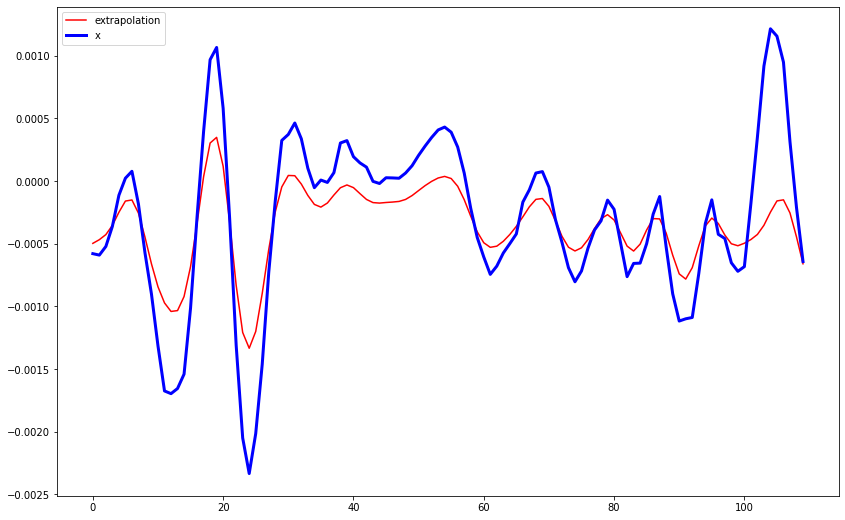

In [80]:
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, A.size), A, 'b', label = 'x', linewidth = 3)
pl.legend()
pl.show()

please note, the last 10 (from 100 to 110)are predicted value, which look pretty good. Next will be building Q learning model.